Data **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from os import sep
df=pd.read_csv('/content/25152746-spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df['label'].value_counts()/(len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [ ]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [ ]:
data=ham.append(spam,ignore_index=True)

In [ ]:
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

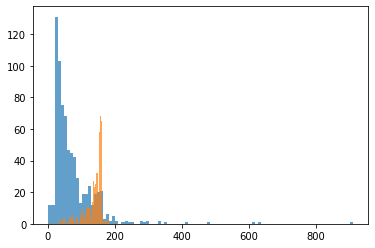

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

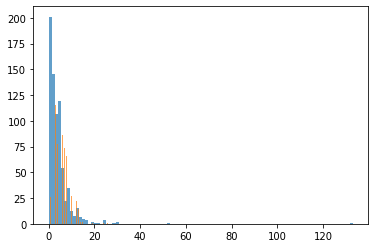

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
x_train.shape

(1045,)

Building the Model (Random Forest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# In information retrieval, tf–idf, short for term frequency–inverse document frequency,
# is a numerical statistic that is intended to reflect how important a word is to a document 
#in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
Classifier=Pipeline([("tfidf",TfidfVectorizer()), ("classifier",RandomForestClassifier(n_estimators=10))    ])

In [ ]:
Classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

Predicting the model

In [ ]:
y_predict=Classifier.predict(x_test)

In [ ]:
y_test,y_predict

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'sp

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_predict)

0.9131403118040089

In [ ]:
confusion_matrix(y_test,y_predict)

array([[224,   3],
       [ 36, 186]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92       227
        spam       0.98      0.84      0.91       222

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



Building the Model SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=Pipeline([("tfidf",TfidfVectorizer()), ("classifier",SVC(C=100,gamma="auto"))    ])

In [ ]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_predict=svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.9309576837416481

In [ ]:
confusion_matrix(y_test,y_predict)

array([[216,  11],
       [ 20, 202]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93       227
        spam       0.95      0.91      0.93       222

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [ ]:
test1=['Hello,You are learning Natural Language Processing']
test2=['Hope,you are doing good and learning new things!']
test3=['Congratulations,you won a lottery ticket worth $1 Million ! To claim call on 446677']

In [ ]:
print(Classifier.predict(test1))
print(Classifier.predict(test2))
print(Classifier.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
